In [100]:
import pandas as pd
from geopy.geocoders import Nominatim


In [101]:
df = pd.read_csv('./data/arboles.csv')

# EDA

In [102]:
df.sample(10)

,id_arbol,direccion,tipo_vereda,lado_vereda,especie,tipo_tendido,distancia_entre_ar,distancia_al_muro,activo,lng,lat
6492,2338,Rivadavia 577,Grande,Impar,Falso mirto,Alta tensión (Con Protección),2.0,3.0,True,-588.443.441.296.459.000,-274.736.426.640.900.000
5415,6372,Calle carayá al 200,Grande,Impar,Sangre de Drago,Ninguno,5.0,3.0,True,-587.457.228.960.889.000,-274.515.421.499.310.000
1565,1868,La Merced 145,Mediana,Impar,Palmera,Alta tensión (Con Protección),10.0,2.0,True,-588.488.386.729.170.000,-274.671.787.558.370.000
545,780,San Luis 1583,Grande,Par,Fresno,Media Tensión (Con Protección),9.0,2.5,True,-588.434.962.110.830.000,-274.745.590.214.049.000
6898,6947,Storni 4674,Chica,Par,Fresno,Media Tensión (Con Protección),15.0,2.0,True,-587.923.731.535.929.000,-27.468.148.232.042.000
149,179,Los talguelches 3150,Chica,Impar,Paraíso,Preensamblado,4.0,4.0,True,-58.814.048.547.319.000,-275.015.849.556.919.000
1536,1834,Irigoyen 158,Chica,Par,Mango,Media Tensión (Con Protección),5.0,2.5,True,-588.486.155.452.270.000,-274.678.018.519.600.000
295,386,Bolivar 1516,Mediana,Par,Ficus variegado,Media Tensión (Con Protección),6.0,2.4,True,-588.317.331.757.779.000,-27.471.412.633.132.000
1979,2298,Entre ríos 1400,Mediana,Par,Fresno,Alta tensión (Con Protección),5.0,2.0,True,-588.445.764.984.030.000,-274.727.551.684.960.000
913,1083,pje julio cortazar,Mediana,Par,Palmera,Ninguno,0.3,3.0,True,-588.525.865.699.780.000,-274.706.407.328.770.000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_arbol            7141 non-null   int64  
 1   direccion           7141 non-null   object 
 2   tipo_vereda         7141 non-null   object 
 3   lado_vereda         7141 non-null   object 
 4   especie             7141 non-null   object 
 5   tipo_tendido        7141 non-null   object 
 6   distancia_entre_ar  7141 non-null   float64
 7   distancia_al_muro   7141 non-null   float64
 8   activo              7141 non-null   bool   
 9   lng                 7141 non-null   object 
 10  lat                 7141 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 565.0+ KB


In [104]:
# Función para convertir latitud o longitud
def convertir_coordenadas(coord_str):
    coord_str = coord_str.replace('.', '')
    coord_str = coord_str[:3] + '.' + coord_str[3:]
    return float(coord_str)

In [105]:
# Aplicar la función a las columnas 'latitud' y 'longitud'
df['lat'] = df['lat'].apply(convertir_coordenadas)
df['lng'] = df['lng'].apply(convertir_coordenadas)

In [107]:
print(df['lat'] )
df

0      -27.471856
1      -27.471663
2      -27.470889
3      -27.470922
4      -27.470951
          ...    
7136   -27.459263
7137   -27.459104
7138   -27.459018
7139   -27.458819
7140   -27.458797
Name: lat, Length: 7141, dtype: float64


,id_arbol,direccion,tipo_vereda,lado_vereda,especie,tipo_tendido,distancia_entre_ar,distancia_al_muro,activo,lng,lat
0,8,San Juan 1278,Chica,Par,Crespón,Ninguno,5.0,1.0,True,-58.837098,-27.471856
1,16,San juan 1268,Chica,Impar,Crespón,Ninguno,5.0,1.0,True,-58.837121,-27.471663
2,17,Bolivar 1074,Mediana,Par,Paraíso,Media Tensión (Con Protección),5.0,2.0,True,-58.837567,-27.470889
3,18,Bolívar 1110,Grande,Par,Crespón,Preensamblado,3.0,1.0,True,-58.836943,-27.470922
4,19,Bolivar 1134,Grande,Par,Crespón,Preensamblado,5.0,2.0,True,-58.836670,-27.470951
...,...,...,...,...,...,...,...,...,...,...,...
7136,7185,Caa guazu,Chica,Par,Lapacho rosado,Ninguno,1.8,0.0,True,-58.831080,-27.459263
7137,7186,Caa guazú,Chica,Par,Lapacho rosado,Ninguno,0.9,0.0,True,-58.830924,-27.459104
7138,7187,Caa guazú,Chica,Par,Ceibo,Ninguno,0.5,0.0,True,-58.830998,-27.459018
7139,7188,Caa guazú,Chica,Par,Palmera,Ninguno,1.3,0.0,True,-58.831131,-27.458819


In [41]:
df.isnull().sum()

id_arbol              0
direccion             0
tipo_vereda           0
lado_vereda           0
especie               0
tipo_tendido          0
distancia_entre_ar    0
distancia_al_muro     0
activo                0
lng                   0
lat                   0
dtype: int64

In [42]:
top_especies = df['especie'].value_counts()
print(top_especies)

especie
Fresno                 1159
Palmera                 900
Lapacho rosado          756
Pata de Buey            454
Naranjo agrio           273
                       ... 
Cordia Americana          1
Eucalipto                 1
Mora de Papel             1
Catalpa bigninoides       1
Mirto                     1
Name: count, Length: 81, dtype: int64


/tmp/ipykernel_19517/2279685588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['tipo_vereda'],palette="ocean")


<Axes: xlabel='count', ylabel='tipo_vereda'>

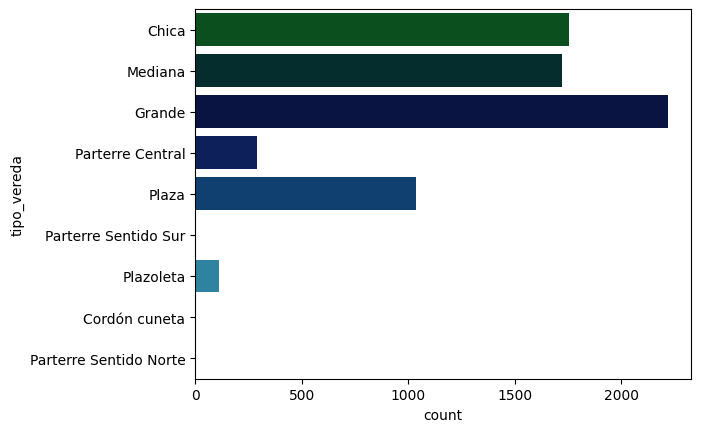

In [43]:
#Graficos estadisticos
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['tipo_vereda'],palette="ocean")

/tmp/ipykernel_19517/3844159208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['tipo_tendido'],palette="ocean")


<Axes: xlabel='count', ylabel='tipo_tendido'>

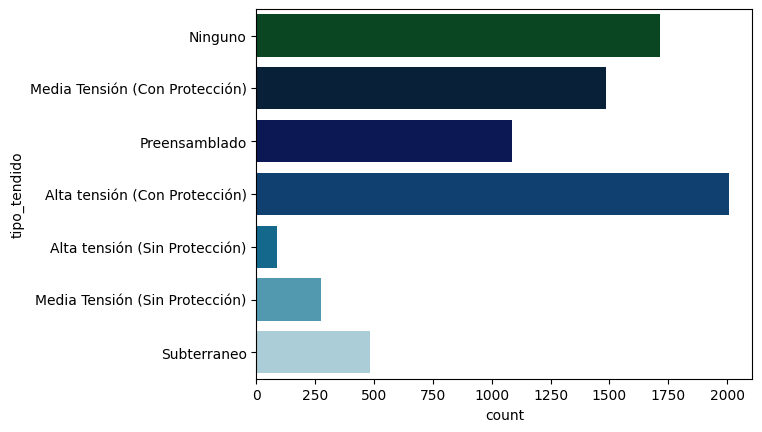

In [44]:
sns.countplot(df['tipo_tendido'],palette="ocean")

<function matplotlib.pyplot.show(close=None, block=None)>

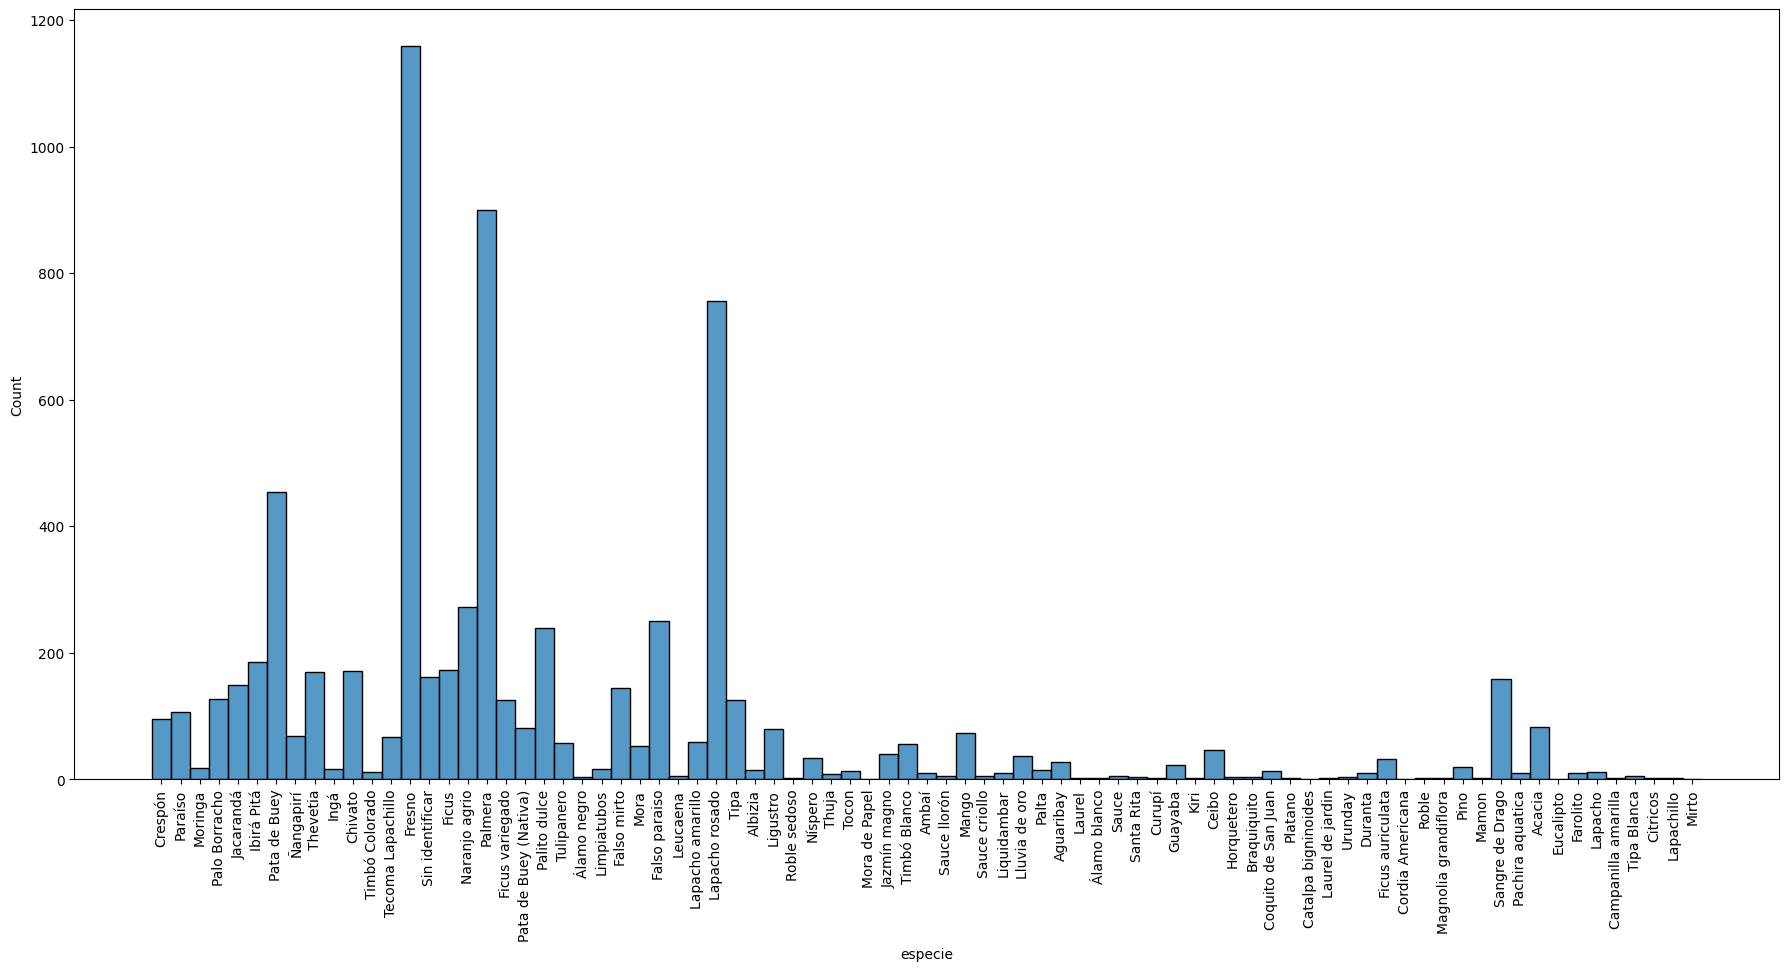

In [45]:
plt.figure(figsize=(22,10))
sns.histplot(data=df,x=df['especie'])
plt.xticks(rotation=90)
plt.show

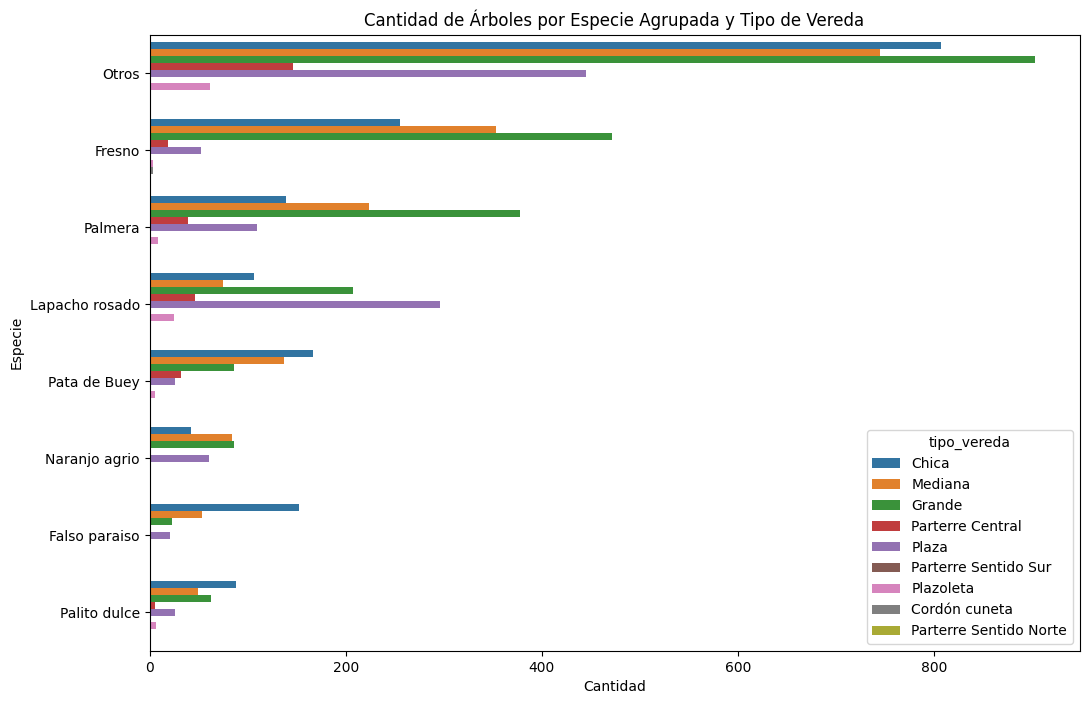

In [46]:
species_counts = top_especies

threshold = 200 

df['especie_agrupada'] = df['especie'].apply(lambda x: x if species_counts[x] >= threshold else 'Otros')

plt.figure(figsize=(12, 8))
sns.countplot(y='especie_agrupada', hue='tipo_vereda', data=df, order=df['especie_agrupada'].value_counts().index)

plt.title('Cantidad de Árboles por Especie Agrupada y Tipo de Vereda')
plt.xlabel('Cantidad')
plt.ylabel('Especie')

plt.show()

In [108]:
# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_aplicacion")

# Función para obtener el barrio
def obtener_barrio(lat, lng):
    if pd.notna(lat) and pd.notna(lng):  # Verificar que no sean NaN
        try:
            location = geolocator.reverse((lat, lng), exactly_one=True)
            if location and 'address' in location.raw:
                return location.raw['address'].get('suburb', 'No encontrado')
        except Exception as e:
            print(f"Error en la geocodificación: {e}")
    return 'No encontrado'

# Aplicar la función a cada fila del DataFrame  
df['barrio'] = df.apply(lambda row: obtener_barrio(row['lat'], row['lng']), axis=1)

# Mostrar el DataFrame con los barrios
print(df['barrio'])

Error en la geocodificación: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=-27.502631849804&lon=-58.834613974934&format=json&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
0       No encontrado
1       No encontrado
2       No encontrado
3       No encontrado
4       No encontrado
            ...      
7136    No encontrado
7137    No encontrado
7138    No encontrado
7139    No encontrado
7140    No encontrado
Name: barrio, Length: 7141, dtype: object


In [111]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame


In [116]:
geometry = [Point(xy) for xy in zip(df['lng'],df['lat'])]

In [117]:
gdf = GeoDataFrame(df,geometry=geometry)

In [118]:
gdf

,id_arbol,direccion,tipo_vereda,lado_vereda,especie,tipo_tendido,distancia_entre_ar,distancia_al_muro,activo,lng,lat,barrio,geometry
0,8,San Juan 1278,Chica,Par,Crespón,Ninguno,5.0,1.0,True,-58.837098,-27.471856,No encontrado,POINT (-58.8371 -27.47186)
1,16,San juan 1268,Chica,Impar,Crespón,Ninguno,5.0,1.0,True,-58.837121,-27.471663,No encontrado,POINT (-58.83712 -27.47166)
2,17,Bolivar 1074,Mediana,Par,Paraíso,Media Tensión (Con Protección),5.0,2.0,True,-58.837567,-27.470889,No encontrado,POINT (-58.83757 -27.47089)
3,18,Bolívar 1110,Grande,Par,Crespón,Preensamblado,3.0,1.0,True,-58.836943,-27.470922,No encontrado,POINT (-58.83694 -27.47092)
4,19,Bolivar 1134,Grande,Par,Crespón,Preensamblado,5.0,2.0,True,-58.836670,-27.470951,No encontrado,POINT (-58.83667 -27.47095)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7136,7185,Caa guazu,Chica,Par,Lapacho rosado,Ninguno,1.8,0.0,True,-58.831080,-27.459263,No encontrado,POINT (-58.83108 -27.45926)
7137,7186,Caa guazú,Chica,Par,Lapacho rosado,Ninguno,0.9,0.0,True,-58.830924,-27.459104,No encontrado,POINT (-58.83092 -27.4591)
7138,7187,Caa guazú,Chica,Par,Ceibo,Ninguno,0.5,0.0,True,-58.830998,-27.459018,No encontrado,POINT (-58.831 -27.45902)
7139,7188,Caa guazú,Chica,Par,Palmera,Ninguno,1.3,0.0,True,-58.831131,-27.458819,No encontrado,POINT (-58.83113 -27.45882)


In [119]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.